# Notebook Description
This notebook provides the analysis of methylation clustering, Differential Methylation (DM) and Differential Methylation Locations (DMLs)

* Check and Set working location

In [1]:
getwd()

[1] "/Users/hollie/Documents/Oly_Oyster_DNA_Methylation/Notebooks"

In [2]:
setwd("/Users/hollie/Documents/Oly_Oyster_DNA_Methylation/Data/MBD/BSmap_Output")

In [3]:
getwd()

[1] "/Users/hollie/Documents/Oly_Oyster_DNA_Methylation/Data/MBD/BSmap_Output"

In [4]:
#install.packages( c("data.table","devtools"))
source("http://bioconductor.org/biocLite.R")
biocLite(c("GenomicRanges","IRanges"))

# install the development version from github
library(devtools)
install_github("al2na/methylKit",build_vignettes=FALSE)
library(methylKit)

Bioconductor version 3.4 (BiocInstaller 1.24.0), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.4 (BiocInstaller 1.24.0), R 3.3.2 (2016-10-31).
Installing package(s) ‘GenomicRanges’, ‘IRanges’



The downloaded binary packages are in
	/var/folders/q0/mr4b1_gd2rd_frkfpr9f00340000gp/T//Rtmp4HfylR/downloaded_packages


Old packages: 'colorspace', 'mgcv', 'Rcpp', 'survival'
Skipping install of 'methylKit' from a github remote, the SHA1 (50f71b8e) has not changed since last install.
  Use `force = TRUE` to force installation
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pm

In [5]:
file.list <- list ('mkfmt_zr1394_1.txt',
'mkfmt_zr1394_2.txt',
'mkfmt_zr1394_3.txt',
'mkfmt_zr1394_4.txt',
'mkfmt_zr1394_5.txt',
'mkfmt_zr1394_6.txt',
'mkfmt_zr1394_7.txt',
'mkfmt_zr1394_8.txt',
'mkfmt_zr1394_9.txt',
'mkfmt_zr1394_10.txt',
'mkfmt_zr1394_11.txt',
'mkfmt_zr1394_12.txt',
'mkfmt_zr1394_13.txt',
'mkfmt_zr1394_14.txt',
'mkfmt_zr1394_15.txt',
'mkfmt_zr1394_16.txt',
'mkfmt_zr1394_17.txt',
'mkfmt_zr1394_18.txt')

In [6]:
sample.id <- list("hc1_2B",
 "hc1_4B",
 "hc2_15B",
 "hc2_17",
 "hc3_1",
 "hc3_5",
 "hc3_7",
 "hc3_10",
 "hc3_11",
 "ss2_9B",
 "ss2_14B",
 "ss2_18B",
 "ss3_3B",
 "ss3_14B",
 "ss3_15B",
 "ss3_16B",
 "ss3_20",
 "ss5_18")

In [7]:
treatment <- c(0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1)

In [8]:
myobj=methRead(file.list,sample.id,assembly="10K",treatment=treatment)

In [195]:
dim(myobj[[1]])

[1] 51004     7

In [171]:
head(myobj[[1]])

chr,start,end,strand,coverage,numCs,numTs
scaffold1002,79,79,+,14,13,1
scaffold1002,81,81,+,17,1,16
scaffold1002,104,104,+,17,11,6
scaffold1002,245,245,+,14,8,6
scaffold1002,1386,1386,-,10,1,9
scaffold1002,1387,1387,-,10,0,10


In [189]:
getMethylationStats(myobj[[1]], plot = F, both.strands = T)

methylation statistics per base

FORWARD STRAND:
summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   20.00   39.21   81.58  100.00 
percentiles:
        0%        10%        20%        30%        40%        50%        60% 
  0.000000   0.000000   0.000000   0.000000   5.882353  20.000000  60.000000 
       70%        80%        90%        95%        99%      99.5%      99.9% 
 76.470588  85.714286  92.857143 100.000000 100.000000 100.000000 100.000000 
      100% 
100.000000 


REVERSE STRAND:
summary:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00   17.65   38.55   81.33  100.00 
percentiles:
       0%       10%       20%       30%       40%       50%       60%       70% 
  0.00000   0.00000   0.00000   0.00000   5.00000  17.64706  57.69231  76.19048 
      80%       90%       95%       99%     99.5%     99.9%      100% 
 85.71429  92.85714 100.00000 100.00000 100.00000 100.00000 100.00000 



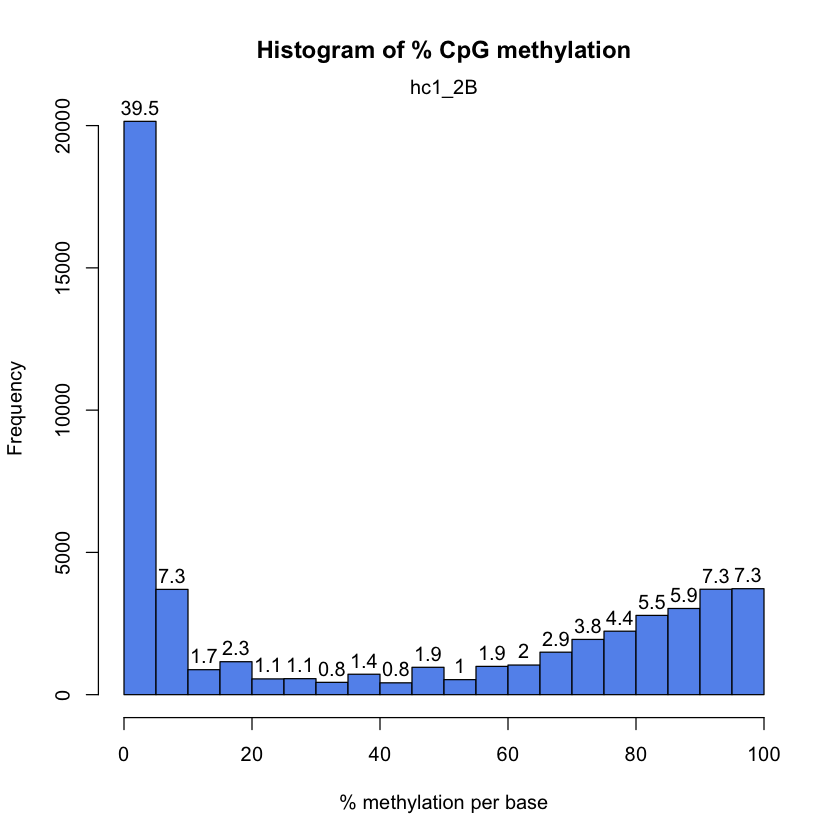

In [11]:
getMethylationStats(myobj[[1]], plot = T, both.strands = F)

In [12]:
library("graphics")


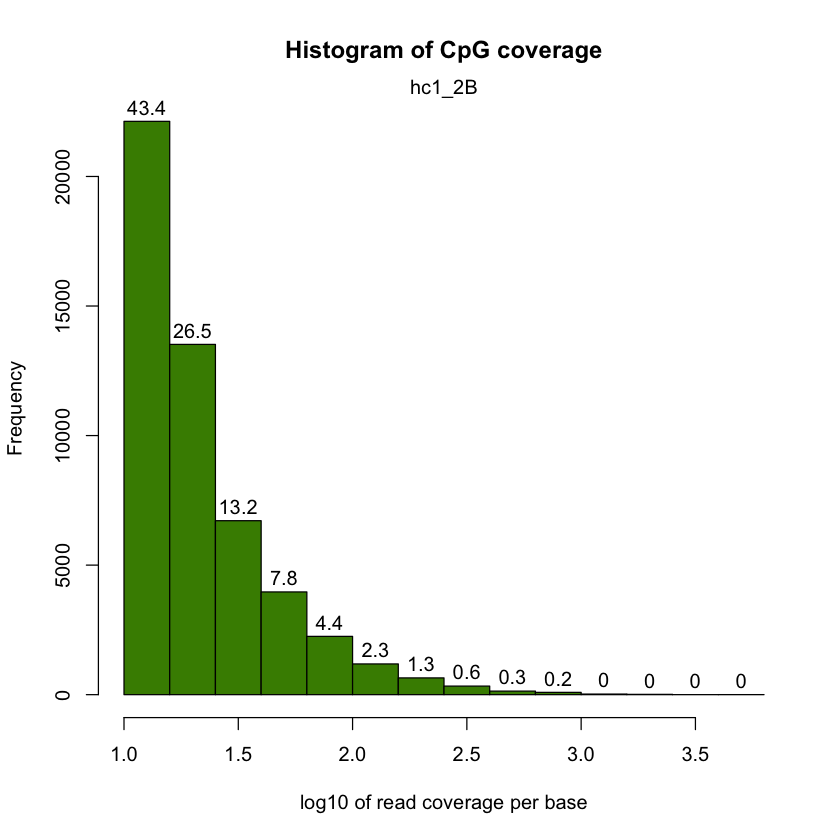

In [13]:
getCoverageStats(myobj[[1]], plot = T, both.strands = F)

In [14]:
zr1394_1_CpG <- getData(myobj[[1]])

In [46]:
dim(zr1394_1_CpG)

[1] 51004     5

In [39]:
head(zr1394_1_CpG)

scaffold1002,79,80,CpG,0.928571428571429
scaffold1002,81,82,CpG,0.0588235294117647
scaffold1002,104,105,CpG,0.647058823529412
scaffold1002,245,246,CpG,0.571428571428571
scaffold1002,1386,1387,CpG,0.1
scaffold1002,1387,1388,CpG,0


In [16]:
zr1394_1_CpG$CpG <- "CpG"

In [17]:
zr1394_1_CpG$Percent_Meth <- zr1394_1_CpG$numCs/(zr1394_1_CpG$numCs+zr1394_1_CpG$numTs)

In [18]:
zr1394_1_CpG$end <- zr1394_1_CpG$start+1

In [19]:
head(zr1394_1_CpG)

chr,start,end,strand,coverage,numCs,numTs,CpG,Percent_Meth
scaffold1002,79,80,+,14,13,1,CpG,0.92857143
scaffold1002,81,82,+,17,1,16,CpG,0.05882353
scaffold1002,104,105,+,17,11,6,CpG,0.64705882
scaffold1002,245,246,+,14,8,6,CpG,0.57142857
scaffold1002,1386,1387,-,10,1,9,CpG,0.10000000
scaffold1002,1387,1388,-,10,0,10,CpG,0.00000000


In [138]:
#zr1394_1_CpG <- zr1394_1_CpG[,c(1:3,8:9)]

In [21]:
zr1394_1_CpG <- cbind(as.character(zr1394_1_CpG$chr), zr1394_1_CpG$start, zr1394_1_CpG$end, zr1394_1_CpG$CpG, zr1394_1_CpG$Percent_Meth)

In [22]:
head(zr1394_1_CpG)

scaffold1002,79,80,CpG,0.928571428571429
scaffold1002,81,82,CpG,0.0588235294117647
scaffold1002,104,105,CpG,0.647058823529412
scaffold1002,245,246,CpG,0.571428571428571
scaffold1002,1386,1387,CpG,0.1
scaffold1002,1387,1388,CpG,0


In [28]:
write.table(zr1394_1_CpG, "zr1394_percentMeth.igv", sep="\t", quote = F, col.names = F, row.names = F)

In [29]:
meth<-unite(myobj)

In [30]:
head(meth)

In [33]:
getCorrelation(meth, plot = F)

           hc1_2B    hc1_4B   hc2_15B    hc2_17     hc3_1     hc3_5     hc3_7
hc1_2B  1.0000000 0.9744097 0.9768372 0.9768662 0.9671130 0.9705630 0.9785439
hc1_4B  0.9744097 1.0000000 0.9730078 0.9754646 0.9680058 0.9679099 0.9757090
hc2_15B 0.9768372 0.9730078 1.0000000 0.9792481 0.9657787 0.9674103 0.9791701
hc2_17  0.9768662 0.9754646 0.9792481 1.0000000 0.9655068 0.9693567 0.9798119
hc3_1   0.9671130 0.9680058 0.9657787 0.9655068 1.0000000 0.9650892 0.9692850
hc3_5   0.9705630 0.9679099 0.9674103 0.9693567 0.9650892 1.0000000 0.9687657
hc3_7   0.9785439 0.9757090 0.9791701 0.9798119 0.9692850 0.9687657 1.0000000
hc3_10  0.9775672 0.9733575 0.9757256 0.9789793 0.9642865 0.9686175 0.9776917
hc3_11  0.9767676 0.9744591 0.9781280 0.9772363 0.9681418 0.9706423 0.9783034
ss2_9B  0.9633398 0.9580220 0.9641067 0.9661762 0.9492645 0.9519483 0.9643056
ss2_14B 0.9667656 0.9595865 0.9689307 0.9689036 0.9499532 0.9524519 0.9671994
ss2_18B 0.9707972 0.9706376 0.9694254 0.9698314 0.9678616 0.9658

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


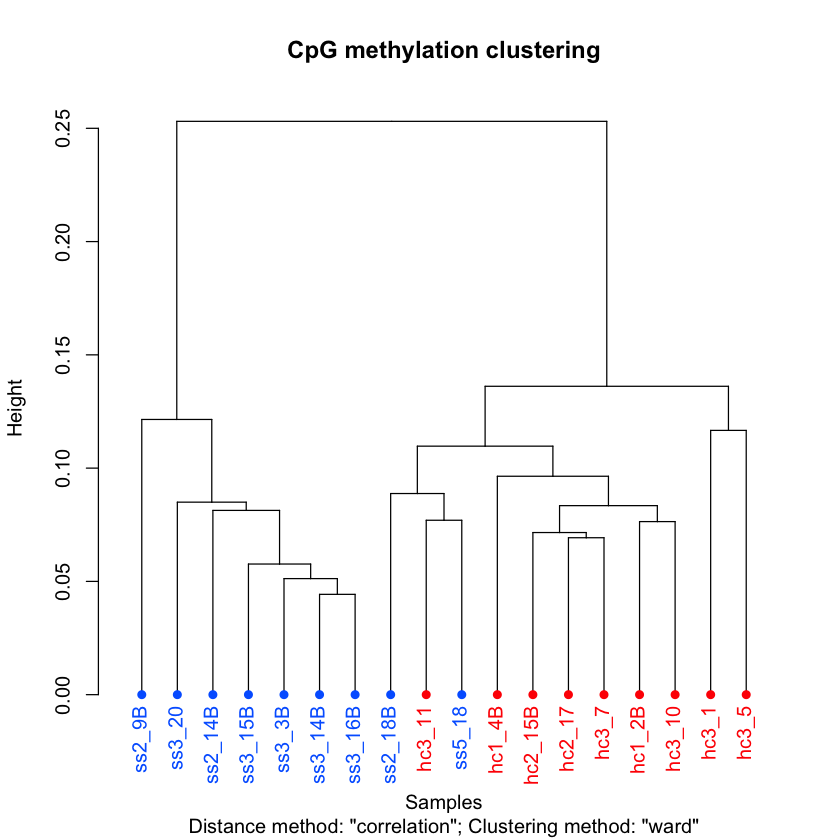

In [34]:
hc<- clusterSamples(meth, dist="correlation", method="ward", plot=T)

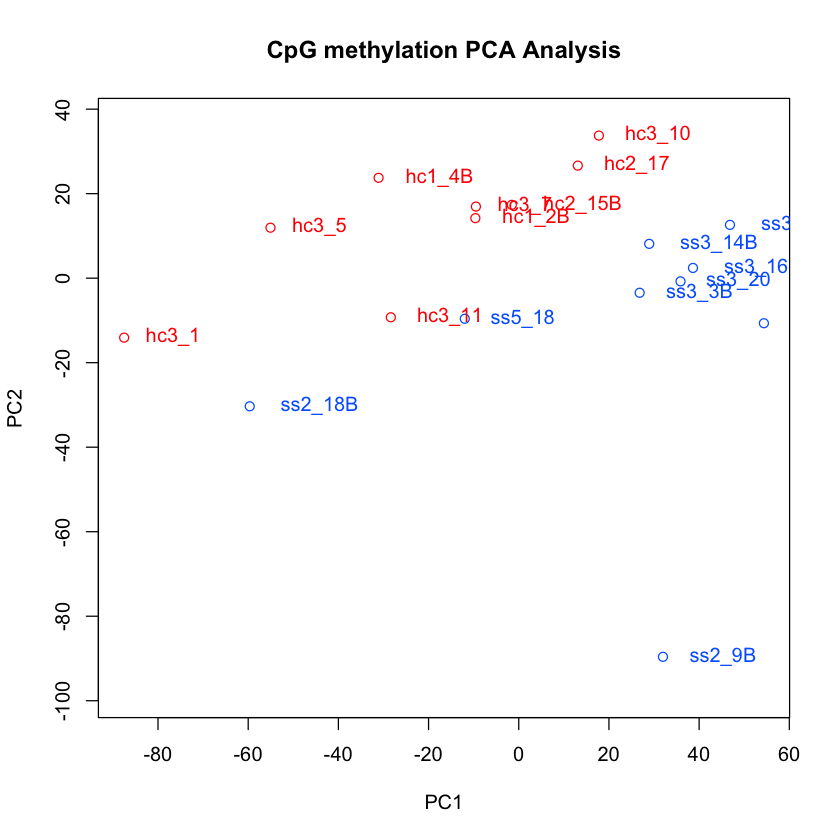

In [35]:
PCA<-PCASamples(meth, scale=T, center=T)

PCA<-PCASamples(meth, scale=T, center=T, screeplot=T)

* Identify the CpG context DMLs specific to SS or HC 

In [36]:
#note that file.list, sample.id, and treatment were defined in prior section
DMLobj <- methRead(file.list,sample.id,assembly="v9",treatment=treatment, context="CpG")



### Unite methylRawList and methylRawListDB objects so only bases with coverage from all samples are retained

In [47]:
pop.DML <-unite(DMLobj)

In [48]:
write.csv(pop.DML, file="Pop.DML")

### Pool replicates within groups to a single sample per group - sums up coverage, numCs and numTs values within each group so one representative sample for each group will be created in a new methylBase object

In [49]:
pop.pooled <- pool(pop.DML, sample.ids = c("HC", "SS"))

In [51]:
dim(pop.pooled)

[1] 16886    10

In [54]:
str(pop.pooled)

'data.frame':	16886 obs. of  10 variables:
Formal class 'methylBase' [package "methylKit"] with 13 slots
  ..@ .Data         :List of 10
  .. ..$ : Factor w/ 1021 levels "scaffold1002",..: 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ : int  11858 11859 11860 11863 11898 11967 11988 12098 12100 12101 ...
  .. ..$ : int  11858 11859 11860 11863 11898 11967 11988 12098 12100 12101 ...
  .. ..$ : Factor w/ 2 levels "-","+": 2 2 1 1 2 1 1 1 1 1 ...
  .. ..$ : num  2250 2310 1333 1425 701 ...
  .. ..$ : num  33 1850 1138 45 2 ...
  .. ..$ : num  2217 460 195 1380 699 ...
  .. ..$ : num  3165 3232 2204 2362 898 ...
  .. ..$ : num  31 2579 1912 99 0 ...
  .. ..$ : num  3134 653 292 2263 898 ...
  ..@ sample.ids    : chr  "HC" "SS"
  ..@ assembly      : chr "v9"
  ..@ context       : chr "CpG"
  ..@ treatment     : num  0 1
  ..@ coverage.index: num  5 8
  ..@ numCs.index   : num  6 9
  ..@ numTs.index   : num  7 10
  ..@ destranded    : logi FALSE
  ..@ resolution    : chr "base"
  ..@ names         : chr

In [50]:
head(pop.pooled)

chr,start,end,strand,coverage1,numCs1,numTs1,coverage2,numCs2,numTs2
scaffold1002,11858,11858,+,2250,33,2217,3165,31,3134
scaffold1002,11859,11859,+,2310,1850,460,3232,2579,653
scaffold1002,11860,11860,-,1333,1138,195,2204,1912,292
scaffold1002,11863,11863,-,1425,45,1380,2362,99,2263
scaffold1002,11898,11898,+,701,2,699,898,0,898
scaffold1002,11967,11967,-,264,7,257,343,4,339


In [149]:
Pops_CpGs <- as.data.frame(pop.pooled)

In [150]:
Pops_CpGs$CpG <- "CpG"

In [151]:
Pops_CpGs$start <- as.numeric(Pops_CpGs$start)

In [152]:
Pops_CpGs$end <- as.numeric(Pops_CpGs$end)

In [153]:
Pops_CpGs$end <- Pops_CpGs$start+1

In [154]:
Pops_CpGs$HC_Percent_Meth <- as.numeric(Pops_CpGs$numCs1)/(as.numeric(Pops_CpGs$numCs1)+as.numeric(Pops_CpGs$numTs1))

In [155]:
Pops_CpGs$SS_Percent_Meth <- as.numeric(Pops_CpGs$numCs2)/(as.numeric(Pops_CpGs$numCs2)+as.numeric(Pops_CpGs$numTs2))

In [156]:
Pops_CpGs <- Pops_CpGs[order(Pops_CpGs$chr,Pops_CpGs$start),]

In [157]:
head(Pops_CpGs)

chr,start,end,strand,coverage1,numCs1,numTs1,coverage2,numCs2,numTs2,CpG,HC_Percent_Meth,SS_Percent_Meth
scaffold1002,11858,11859,+,2250,33,2217,3165,31,3134,CpG,0.014666667,0.009794629
scaffold1002,11859,11860,+,2310,1850,460,3232,2579,653,CpG,0.800865801,0.797957921
scaffold1002,11860,11861,-,1333,1138,195,2204,1912,292,CpG,0.853713428,0.867513612
scaffold1002,11863,11864,-,1425,45,1380,2362,99,2263,CpG,0.031578947,0.041913633
scaffold1002,11898,11899,+,701,2,699,898,0,898,CpG,0.002853067,0.000000000
scaffold1002,11967,11968,-,264,7,257,343,4,339,CpG,0.026515152,0.011661808


In [163]:
HC_CpG <- cbind(as.character(Pops_CpGs$chr), Pops_CpGs$start, Pops_CpGs$end, Pops_CpGs$CpG, Pops_CpGs$HC_Percent_Meth)

In [191]:
head(HC_CpG)

scaffold1002,11858,11859,CpG,0.0146666666666667
scaffold1002,11859,11860,CpG,0.800865800865801
scaffold1002,11860,11861,CpG,0.853713428357089
scaffold1002,11863,11864,CpG,0.0315789473684211
scaffold1002,11898,11899,CpG,0.00285306704707561
scaffold1002,11967,11968,CpG,0.0265151515151515


In [165]:
SS_CpG <- cbind(as.character(Pops_CpGs$chr), Pops_CpGs$start, Pops_CpGs$end, Pops_CpGs$CpG, Pops_CpGs$SS_Percent_Meth)

In [166]:
head(SS_CpG)

scaffold1002,11858,11859,CpG,0.00979462875197472
scaffold1002,11859,11860,CpG,0.797957920792079
scaffold1002,11860,11861,CpG,0.867513611615245
scaffold1002,11863,11864,CpG,0.041913632514818
scaffold1002,11898,11899,CpG,0
scaffold1002,11967,11968,CpG,0.0116618075801749


In [169]:
write.table(HC_CpG, "HC_CpG.igv", sep="\t", quote=F, col.names=F, row.names=F)

In [170]:
write.table(SS_CpG, "SS_CpG.igv", sep="\t", quote=F, col.names=F, row.names=F)

In [30]:
write.csv(pop.pooled, file="DMLs_rep_Pop")

In [32]:
pop.DML.fisher <- calculateDiffMeth(pop.pooled)

In [35]:
pop.DML.p <- getData(pop.DML.fisher)

* Filter the significant DML data for p values <0.01 and methylation difference between populations of 10

In [79]:
pop.DML.filt_hyper <- pop.DML.p[pop.DML.p$pvalue < 0.01 & pop.DML.p$meth.diff > 10,]

In [80]:
#write.csv(pop.DML.filt, file="Pop_DML_filt_0.01_10")
dim(pop.DML.filt_hyper)

[1] 627   7

In [87]:
pop.DML.filt_hypo <- pop.DML.p[pop.DML.p$pvalue < 0.01 & pop.DML.p$meth.diff < (-10),]

In [88]:
#write.csv(pop.DML.filt, file="Pop_DML_filt_0.01_10")
dim(pop.DML.filt_hypo)

[1] 240   7

In [89]:
pop.DML.filt_hyper

,chr,start,end,strand,pvalue,qvalue,meth.diff
8,scaffold1002,12098,12098,-,4.617960e-05,7.236472e-04,19.35534
12,scaffold1002,12117,12117,-,6.785852e-07,1.921733e-05,22.95082
22,scaffold1004,13415,13415,+,4.312404e-06,9.565440e-05,10.34970
23,scaffold1004,13416,13416,-,8.727874e-10,5.159726e-08,13.00755
30,scaffold1004,13433,13433,-,9.053115e-08,3.354115e-06,24.97085
58,scaffold1023,15910,15910,+,9.454703e-04,8.859852e-03,14.46462
111,scaffold1036,9565,9565,+,7.703240e-11,5.455294e-09,12.29936
113,scaffold1036,9574,9574,+,1.130414e-11,9.203797e-10,14.10498
118,scaffold1036,9586,9586,+,7.085878e-13,7.084363e-11,14.05604
120,scaffold1036,9595,9595,+,1.417745e-16,2.471437e-14,17.97699


In [90]:
pop.DML.filt_hypo

,chr,start,end,strand,pvalue,qvalue,meth.diff
10,scaffold1002,12101,12101,-,8.848136e-04,8.405287e-03,-12.10670
42,scaffold1023,15652,15652,-,6.102972e-03,3.765094e-02,-11.21444
63,scaffold1023,16004,16004,-,1.856951e-06,4.549393e-05,-10.15478
148,scaffold1036,11606,11606,-,1.761040e-05,3.192670e-04,-13.81381
160,scaffold1036,14361,14361,-,1.576711e-08,7.029076e-07,-18.57367
165,scaffold1036,14467,14467,+,1.871511e-07,6.221786e-06,-10.07461
383,scaffold1122,5325,5325,-,4.089772e-20,1.049226e-17,-28.52022
462,scaffold1162,8211,8211,+,2.194616e-09,1.217975e-07,-10.10877
717,scaffold1248,1047,1047,+,1.105190e-05,2.171585e-04,-18.56003
1104,scaffold1433,7513,7513,-,2.848618e-06,6.643724e-05,-10.72606


In [91]:
pop.DML.filt <- pop.DML.p[pop.DML.p$pvalue < 0.01 & pop.DML.p$meth.diff>10 | pop.DML.p$meth.diff<(-10),]

In [92]:
dim(pop.DML.filt)

[1] 886   7

In [93]:
pop.DML.filt

,chr,start,end,strand,pvalue,qvalue,meth.diff
8,scaffold1002,12098,12098,-,4.617960e-05,7.236472e-04,19.35534
10,scaffold1002,12101,12101,-,8.848136e-04,8.405287e-03,-12.10670
12,scaffold1002,12117,12117,-,6.785852e-07,1.921733e-05,22.95082
22,scaffold1004,13415,13415,+,4.312404e-06,9.565440e-05,10.34970
23,scaffold1004,13416,13416,-,8.727874e-10,5.159726e-08,13.00755
30,scaffold1004,13433,13433,-,9.053115e-08,3.354115e-06,24.97085
42,scaffold1023,15652,15652,-,6.102972e-03,3.765094e-02,-11.21444
58,scaffold1023,15910,15910,+,9.454703e-04,8.859852e-03,14.46462
63,scaffold1023,16004,16004,-,1.856951e-06,4.549393e-05,-10.15478
111,scaffold1036,9565,9565,+,7.703240e-11,5.455294e-09,12.29936


In [94]:
write.csv(pop.DML.filt, file="pop.DML.filt_0.01_abs10")